In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
data2019 = pd.read_csv("survey_results_public2019.csv")

In [22]:
data2020 = pd.read_csv("survey_results_public2020.csv")

Age Comparisons with year:

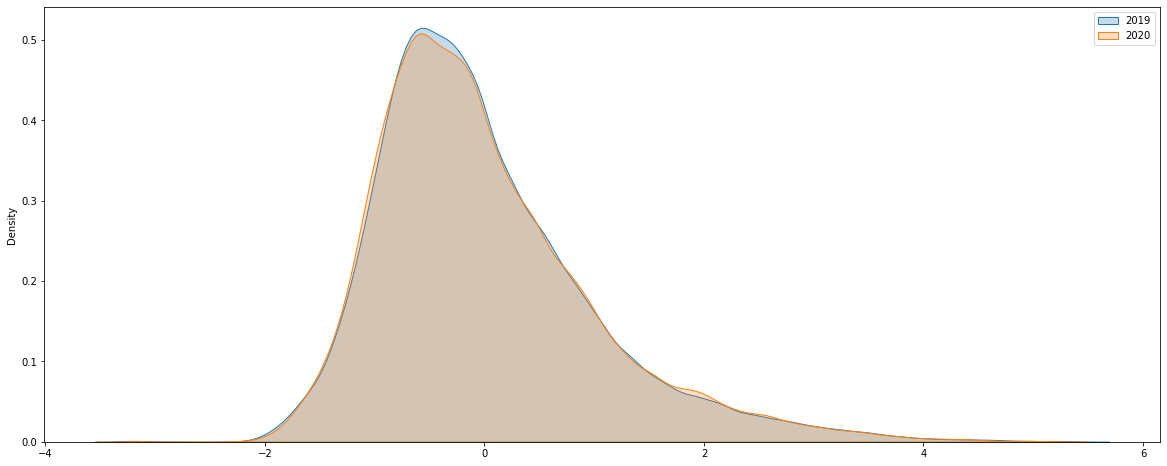

In [8]:
from sklearn.preprocessing import StandardScaler

ages2019 = data2019[data2019["Age"]<80]["Age"].to_numpy()
ages2020 = data2020[data2020["Age"]<80]["Age"].to_numpy()

scale2019 = StandardScaler().fit(ages2019.reshape(-1,1))
scale2020 = StandardScaler().fit(ages2020.reshape(-1,1))

ages2019scaled = scale2019.transform(ages2019.reshape(-1,1))
ages2020scaled = scale2020.transform(ages2020.reshape(-1,1))

f=plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
sns.kdeplot(x=ages2019scaled.reshape(1,-1)[0], shade=True, label="2019")
sns.kdeplot(x=ages2020scaled.reshape(1,-1)[0], shade=True, label="2020")

plt.legend()

Here, we can see that there hasn't been any kind of major shift in the standardized age distribution of the developers, apart from a slight reduction in the peak

Years Coded vs Years Coded as a Professional:

<Figure size 1440x576 with 0 Axes>

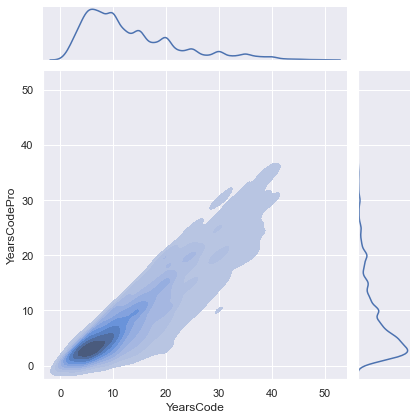

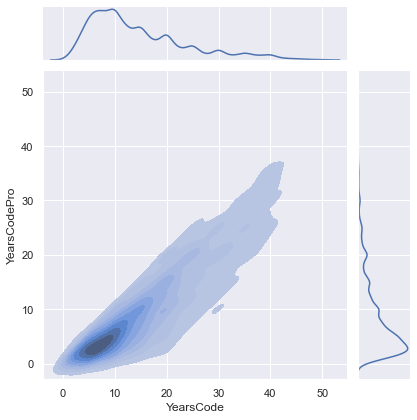

In [20]:
# sns.jointplot(x=data2019["YearsCode"], y=data2019["YearsCodePro"], kind="kde")
# sns.jointplot(x=data2020["YearsCode"], y=data2020["YearsCodePro"], kind="kde")
def years_joint_plot(data):
    years = (
        data[["YearsCode", "YearsCodePro"]]
        .drop(
            data.index[
                (data["YearsCode"] == "Less than 1 year")
                | (data["YearsCode"] == "More than 50 years")
                | (data["YearsCodePro"] == "Less than 1 year")
                | (data["YearsCodePro"] == "More than 50 years")
            ]
        )
        .dropna()
    )

    sns.jointplot(
        x=years["YearsCode"].astype(str).astype(int),
        y=years["YearsCodePro"].astype(str).astype(int),
        kind="kde",
        shade=True
)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
years_joint_plot(data2019)
years_joint_plot(data2020)


We can see that in both years, there is a somewhat linear relationship between the years coded and the years coded as a professional

In [31]:
for i in data2020:
    plot1 = pd.value_counts(data2020[i], dropna=False)
    plot1 = plot1.to_frame(name="Frequency")
    plot1["Value"] = plot1.index
    #   print(list(plot1["Value"]))
    #   print(plot1["Frequency"].values)
    print(i)
    print(plot1)
    print("\n\n\n")


Respondent
       Frequency  Value
1              1      1
43775          1  43775
43761          1  43761
43762          1  43762
43763          1  43763
...          ...    ...
21577          1  21577
21578          1  21578
21579          1  21579
21580          1  21580
65112          1  65112

[64461 rows x 2 columns]




MainBranch
                                                    Frequency  \
I am a developer by profession                          47193   
I am a student who is learning to code                   7970   
I am not primarily a developer, but I write cod...       5502   
I code primarily as a hobby                              2314   
I used to be a developer by profession, but no ...       1183   
NaN                                                       299   

                                                                                                Value  
I am a developer by profession                                         I am a developer by professio

Distribution of Commonly Used Web Frames:

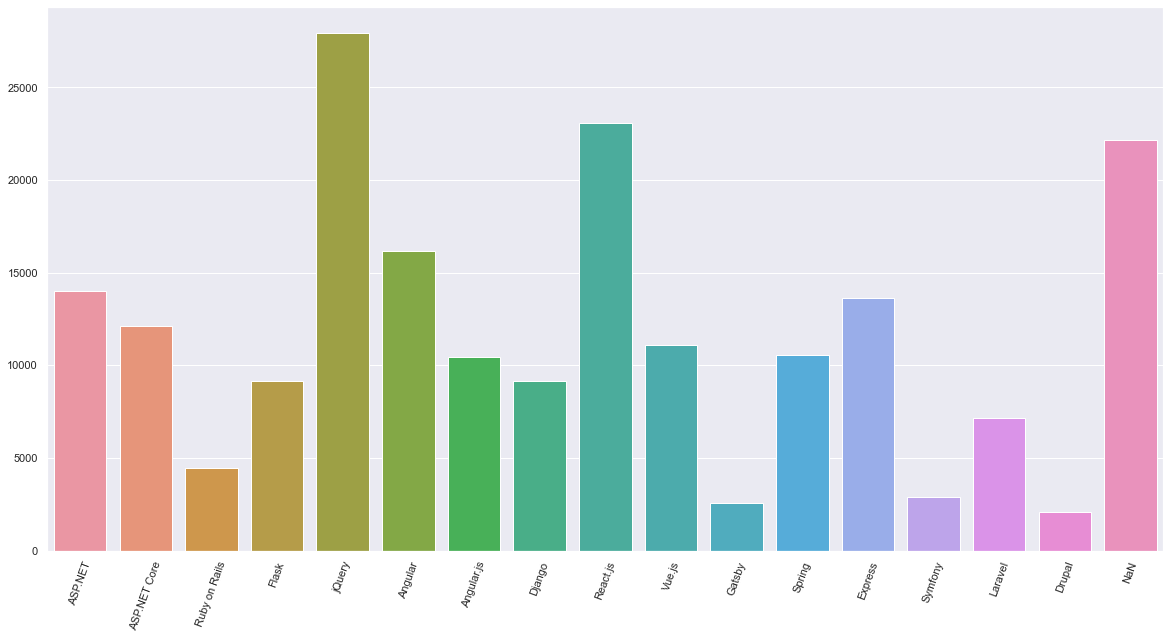

In [13]:
from collections import Counter
webframe_counter=Counter()
# langs=[]
nan_counter=0
for i in data2020["WebframeWorkedWith"]:
  if type(i)==float:
    nan_counter+=1
  else:
    webframes=i.split(';')
  webframe_counter.update(webframes)
  
# print(language_counter.most_common(5))
webs=list(webframe_counter.keys())
webs.append('NaN')
no=list(webframe_counter.values())
no.append(nan_counter)
# for i in range(len(langs)):
#   print(langs[i])
#   # langs[i]=langs[i][0]
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
sns.barplot(x=webs, y=no)
plt.xticks(rotation=70)
plt.show()

Distribution of Operating Systems Used:

             OpSys2019  OpSys2020
Windows          41714      27170
MacOS            23541      14075
Linux-based      22472      14932
BSD                124         51


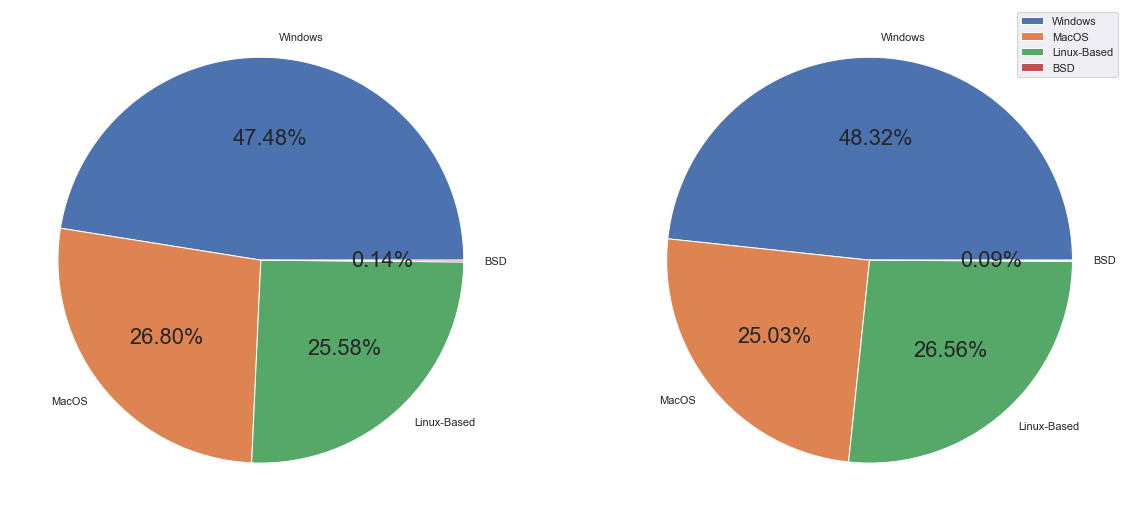

In [114]:
# print(data2020["OpSys"].value_counts().to_numpy())
# print(data2020["OpSys"].value_counts())
legend = ["Windows", "MacOS", "Linux-Based", "BSD"]

opsys_df = pd.DataFrame(data2019["OpSys"].value_counts())
opsys_df.columns = ["OpSys2019"]

opsys_df["OpSys2020"] = [
    (data2020["OpSys"] == "Windows").sum(),
    (data2020["OpSys"] == "MacOS").sum(),
    (data2020["OpSys"] == "Linux-based").sum(),
    (data2020["OpSys"] == "BSD").sum(),
]

plt.rcParams.update()
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
print(pd.DataFrame(opsys_df))
plt.subplot(1, 2, 1)
plt.pie(x=opsys_df["OpSys2019"], labels=legend, autopct="%1.2f%%")
# sns.histplot(data2019["OpSys"])
# plt.legend()
# plt.show()
plt.subplot(1, 2, 2)
plt.pie(x=opsys_df["OpSys2020"], labels=legend, autopct="%1.2f%%")
# sns.histplot(data2020["OpSys"])
plt.legend()
plt.show()


Here we can see that the percentage share of Linux-Based operating systems rose to be above that of MacOS operating system

Distribution of Languages Used (2019, 2020):

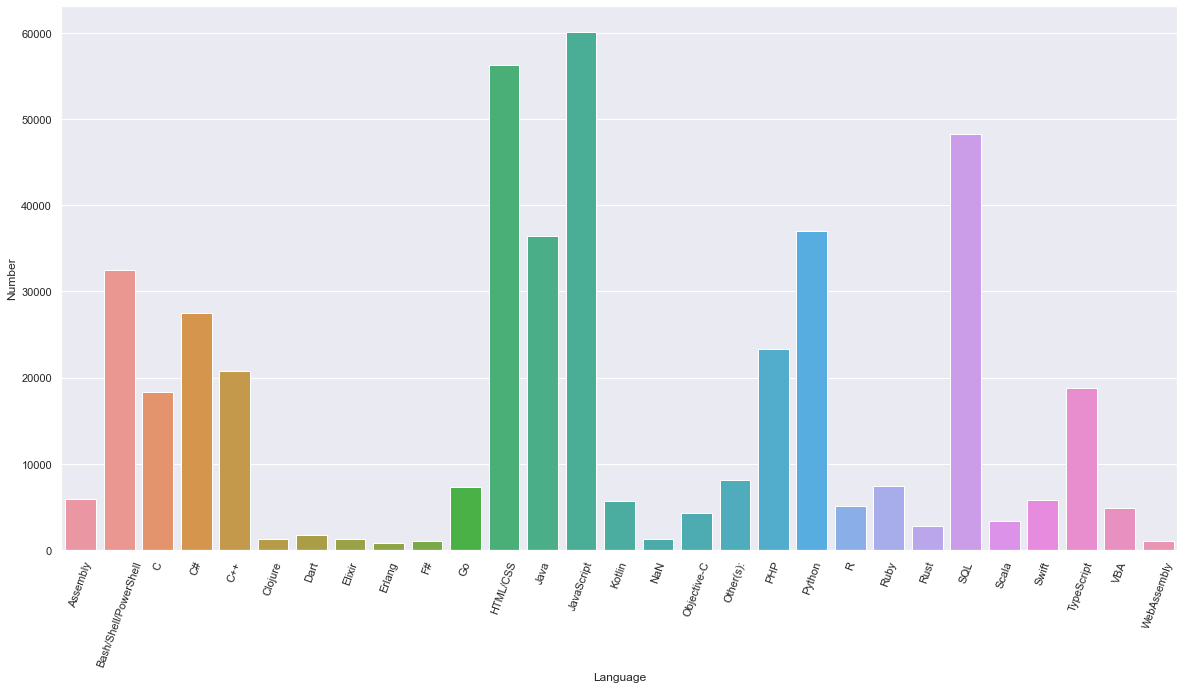

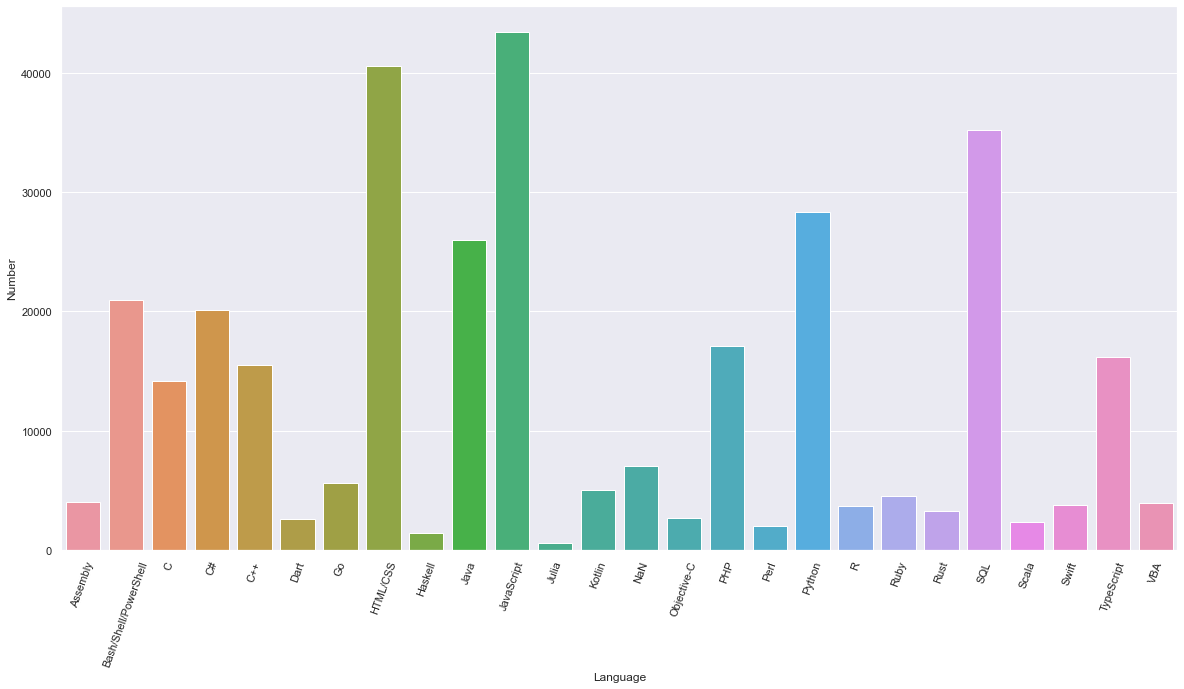

In [176]:
from collections import Counter


def language_line_plot(data):
    language_counter = Counter()
    nan_counter = 0
    for i in data["LanguageWorkedWith"]:
        if type(i) == float:
            nan_counter += 1
        else:
            languages = i.split(";")
        language_counter.update(languages)

    langs = list(language_counter.keys())
    langs.append("NaN")
    no = list(language_counter.values())
    no.append(nan_counter)

    df = pd.DataFrame({"Language": langs, "Number": no})
    df = df.sort_values(by="Language")
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(10)
    sns.barplot(x="Language", y="Number", data=df)
    plt.xticks(rotation=70)


language_line_plot(data2019)
language_line_plot(data2020)
plt.show()


Detailed Breakdown of Languages Used by Each Developer Type:

Developer, desktop or enterprise applications


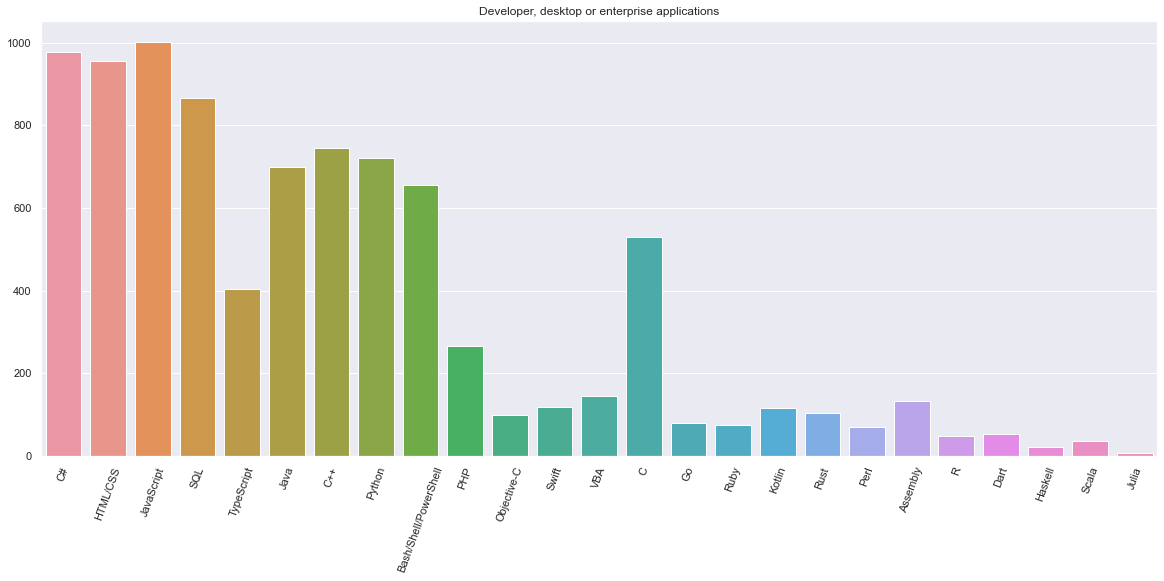


Developer, full-stack


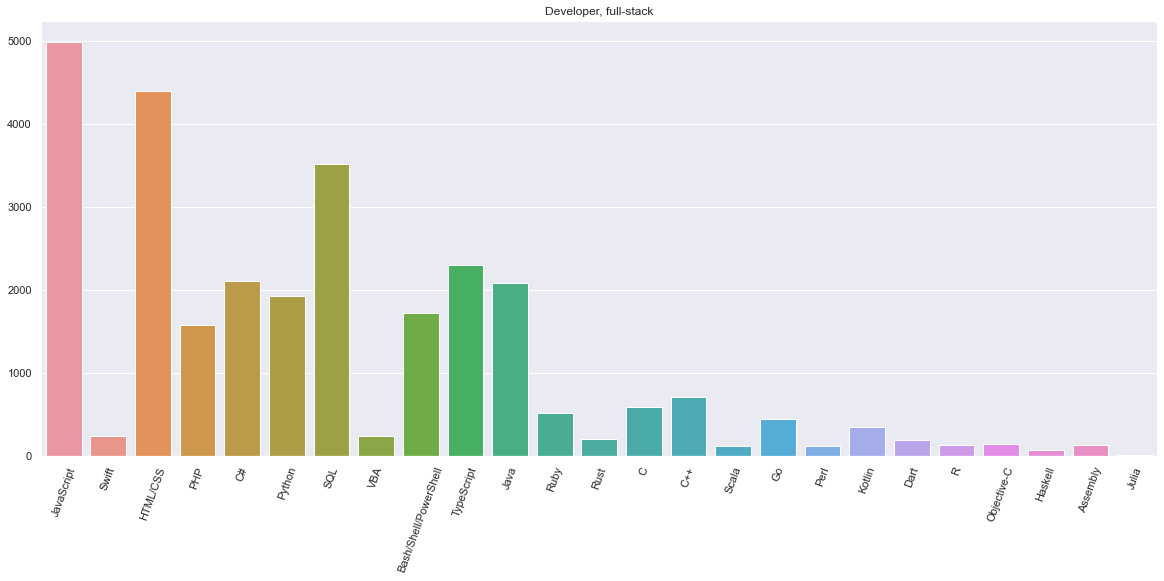


Designer


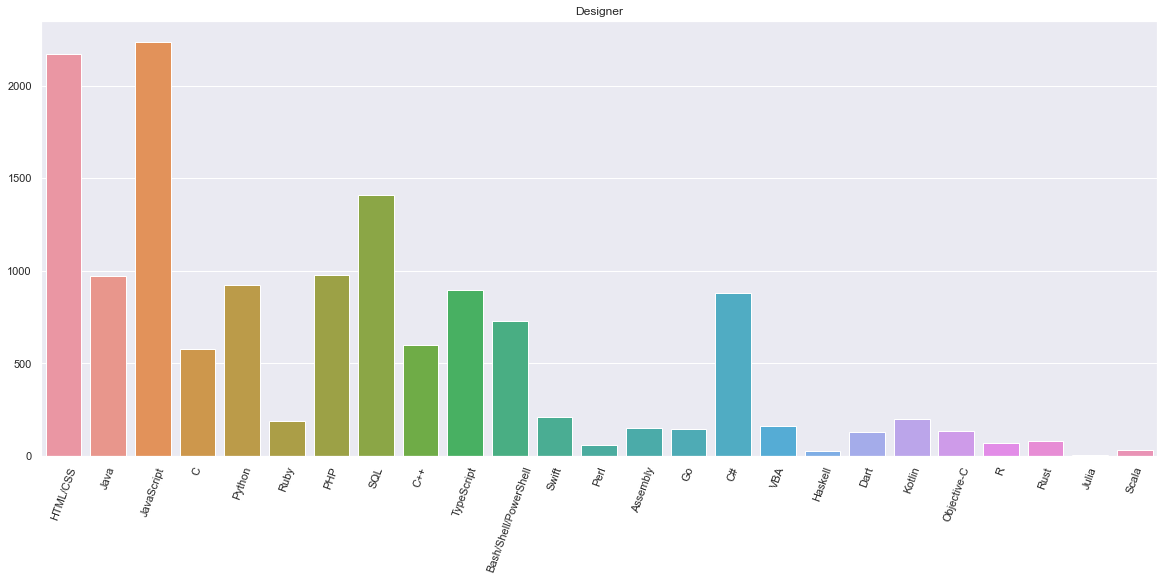


Developer, back-end


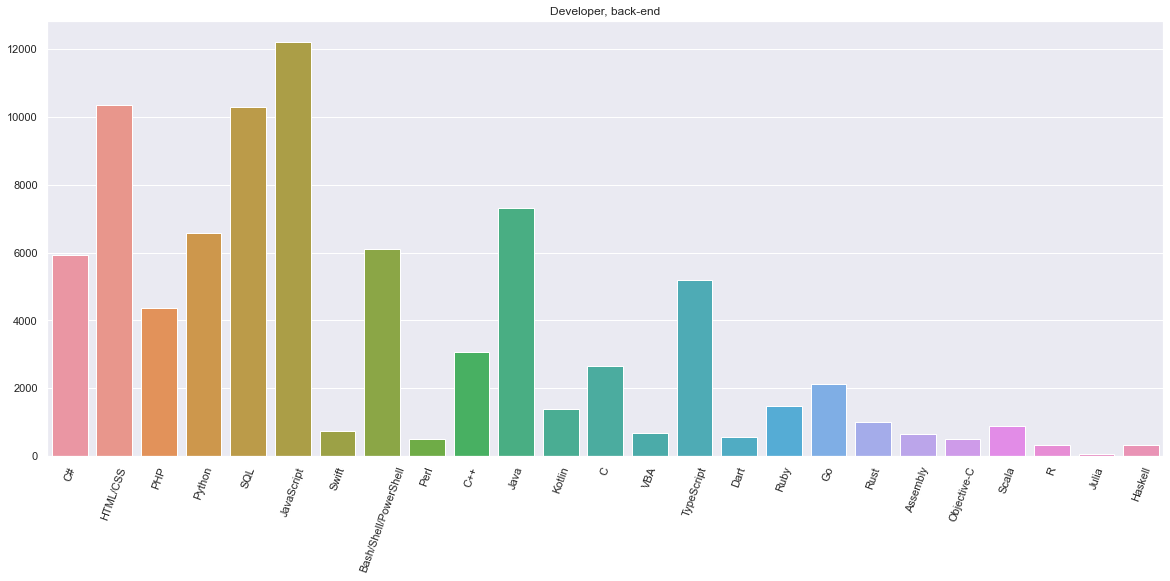


Database administrator


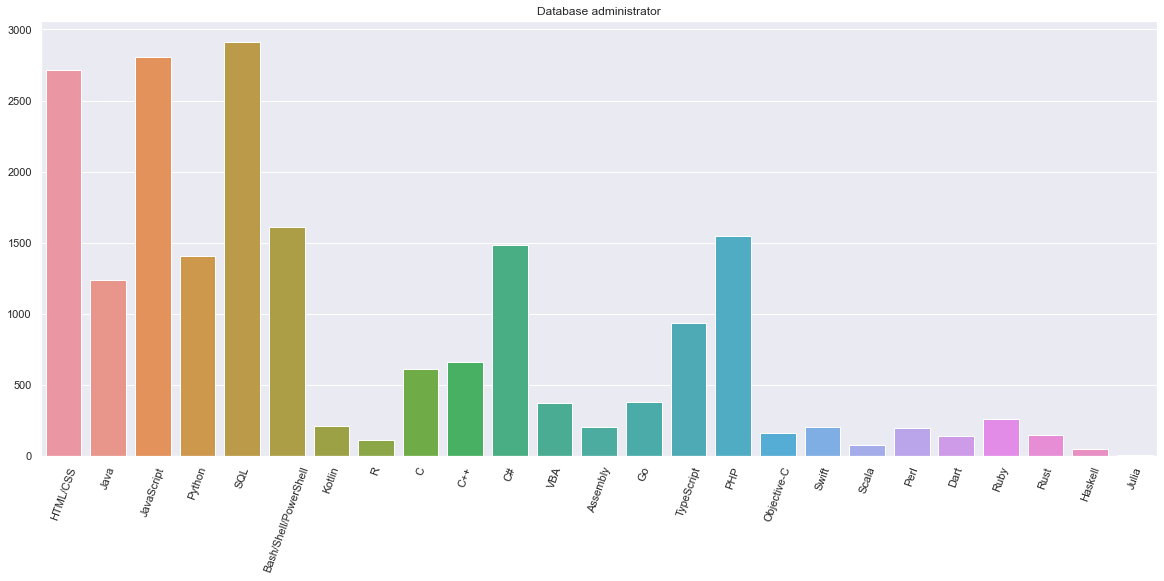


Data or business analyst


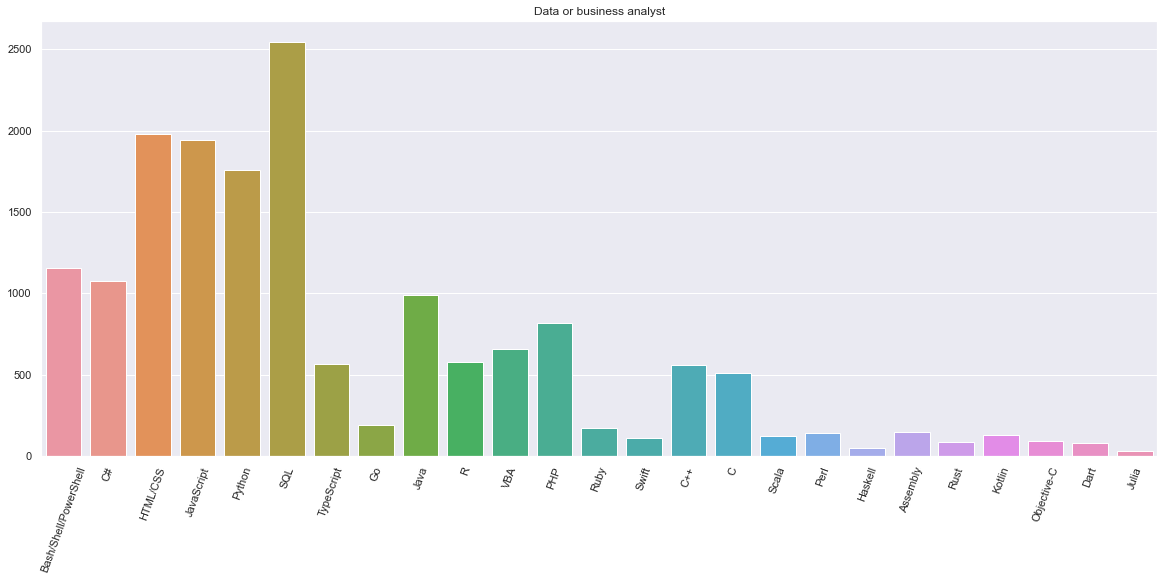


Academic researcher


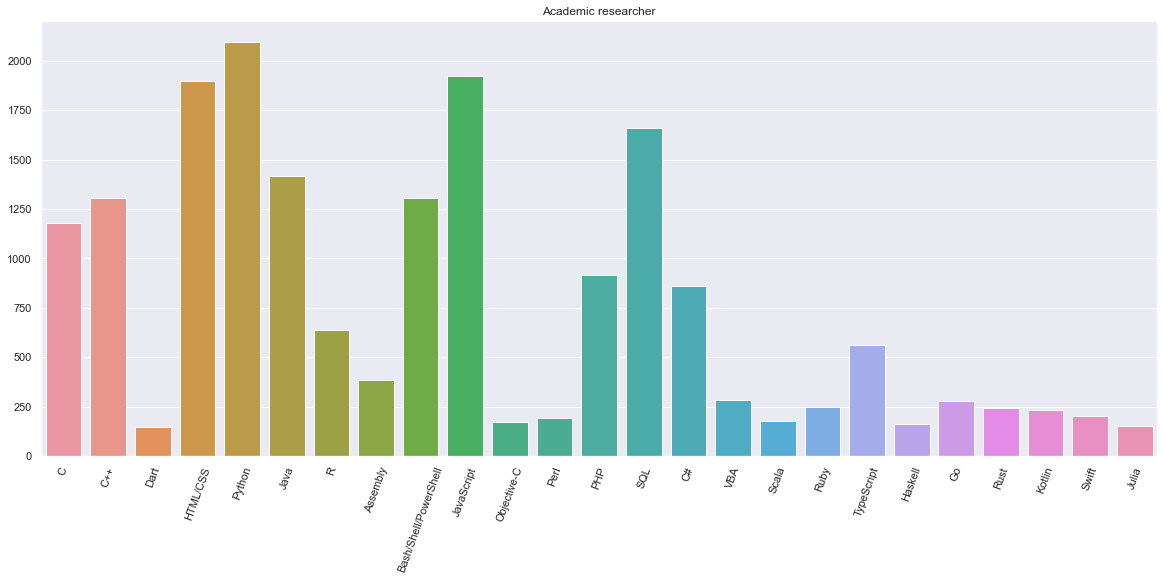


Developer, front-end


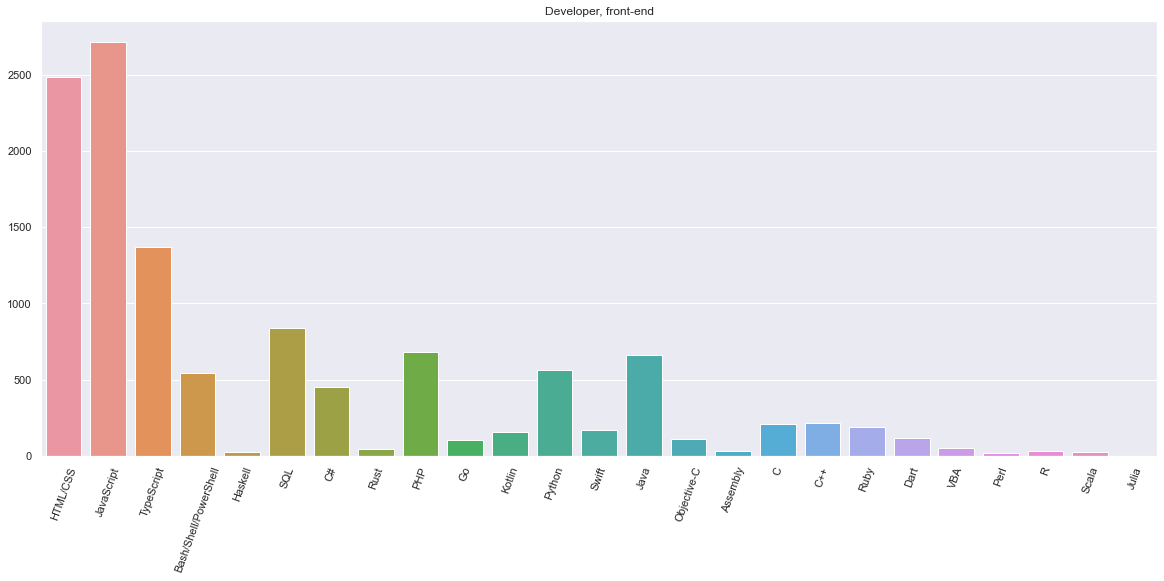


Data scientist or machine learning specialist


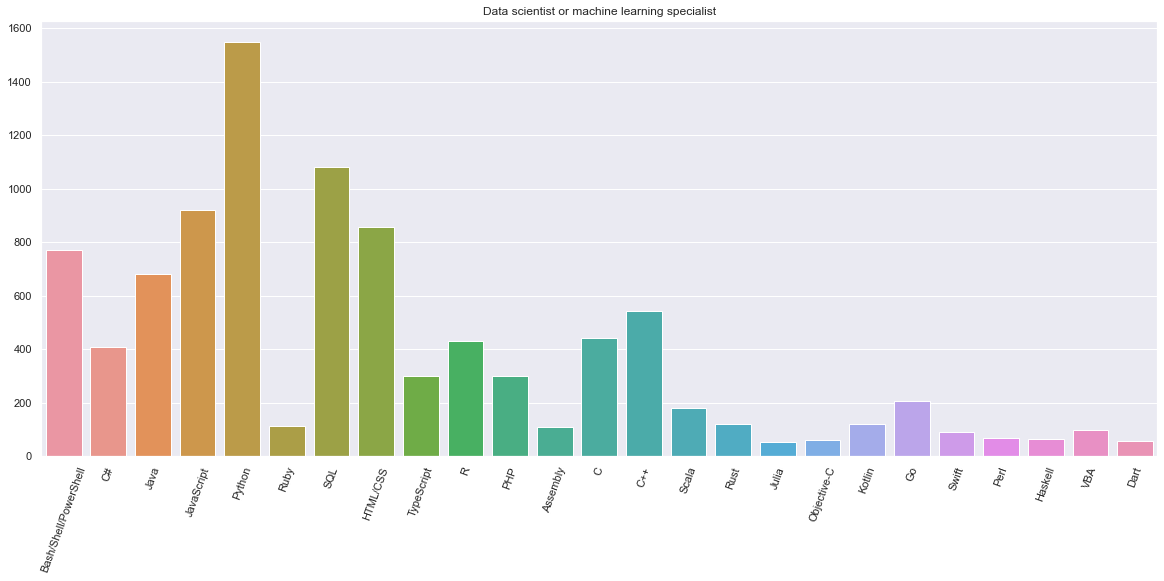


Developer, mobile


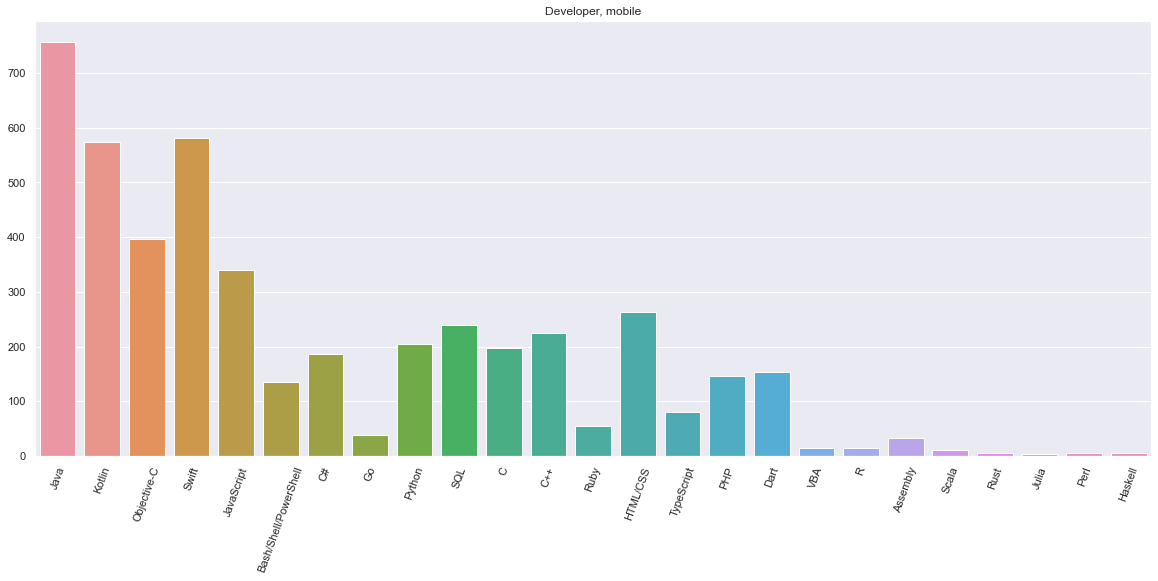


DevOps specialist


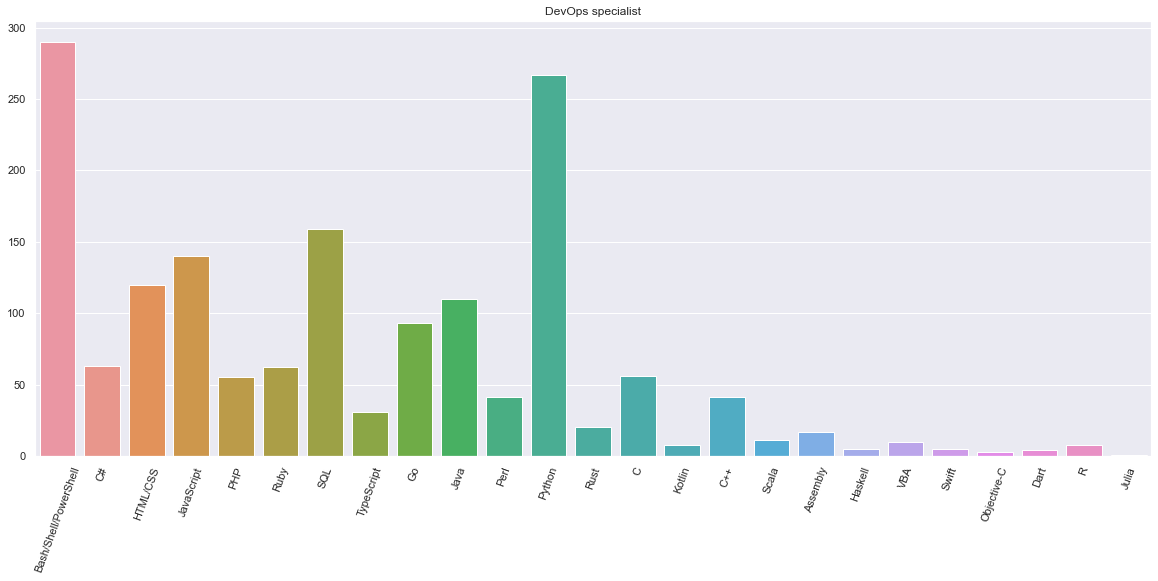


Developer, QA or test


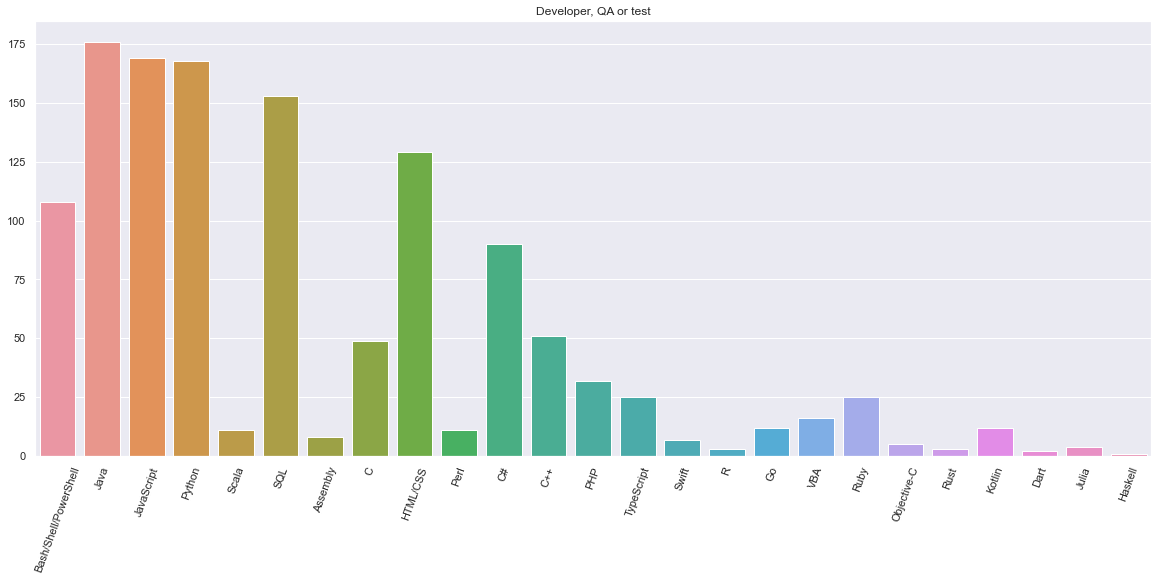


System administrator


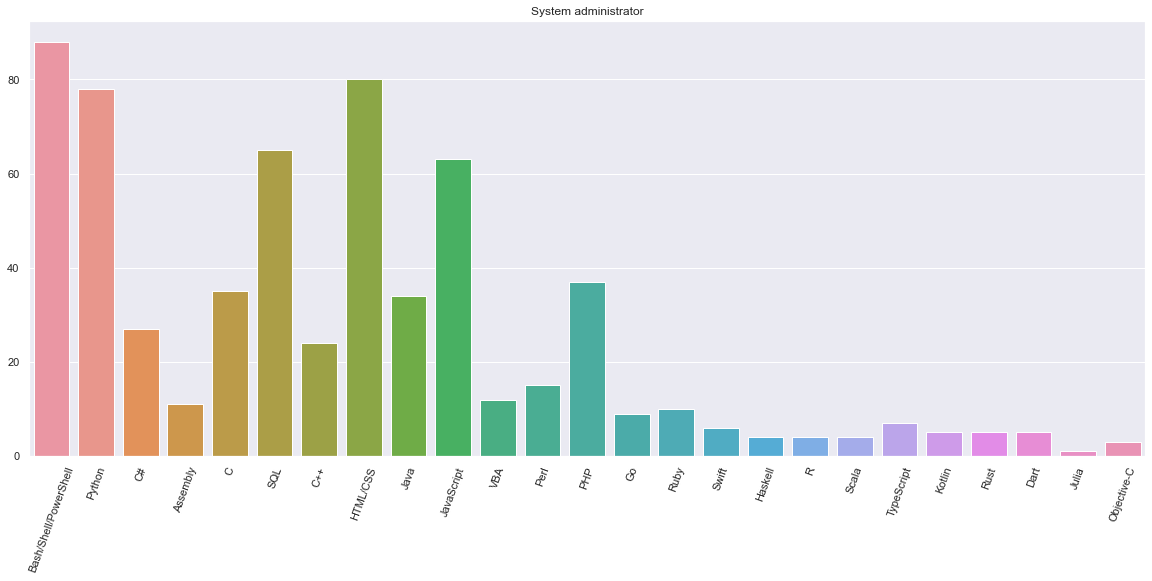


Developer, embedded applications or devices


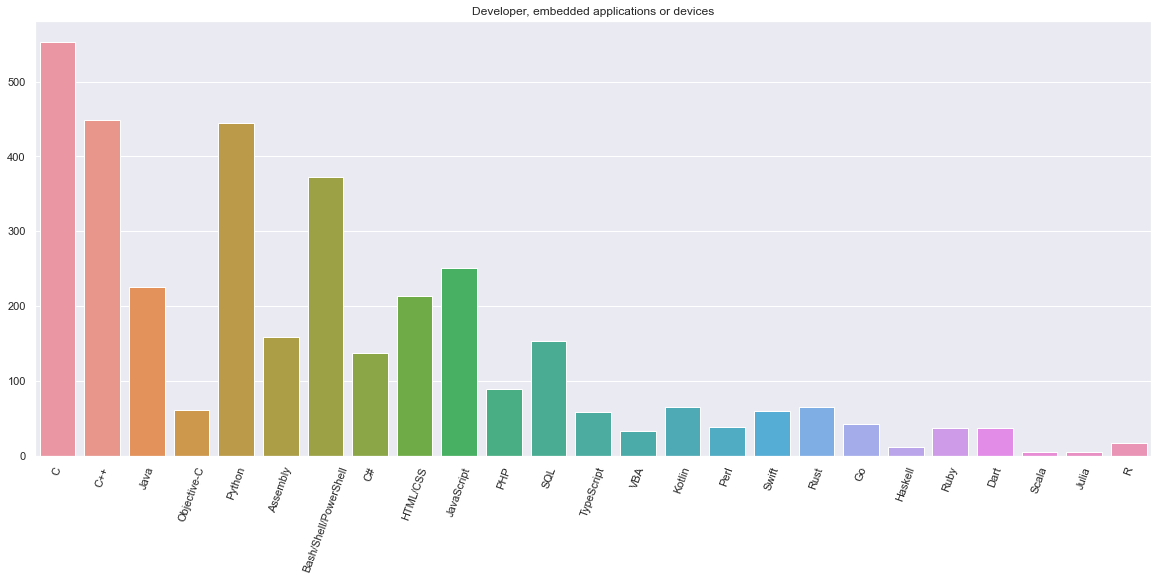


Engineering manager


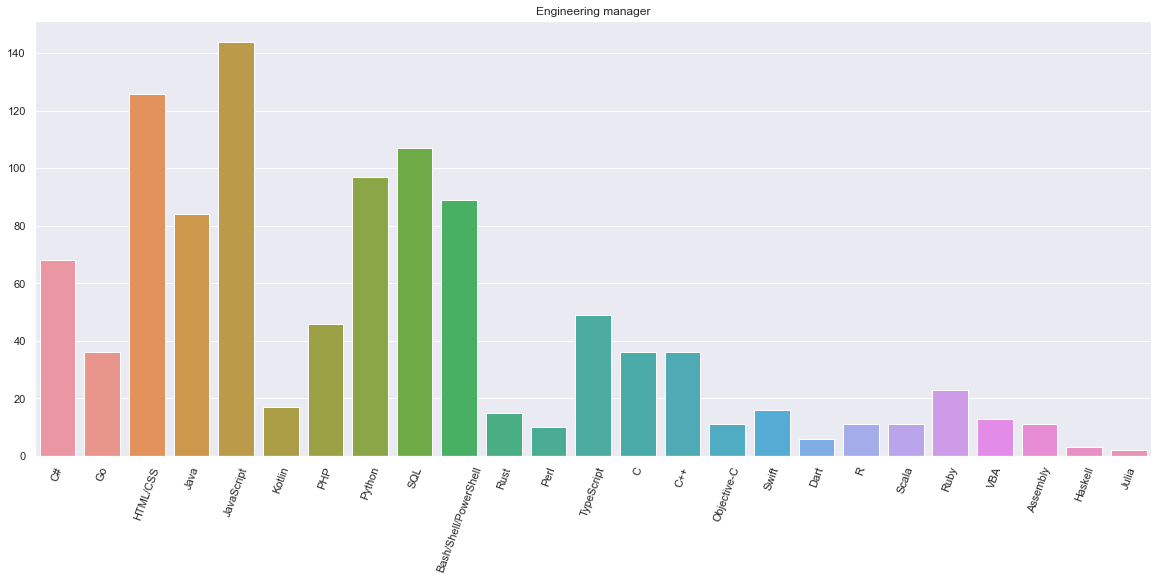


Senior executive/VP


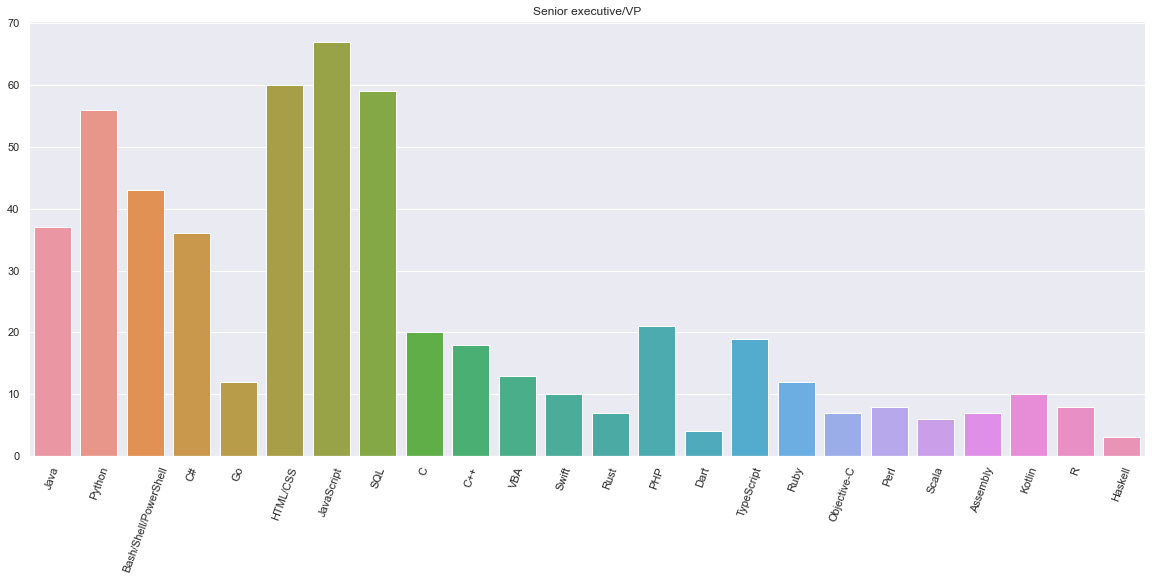


Developer, game or graphics


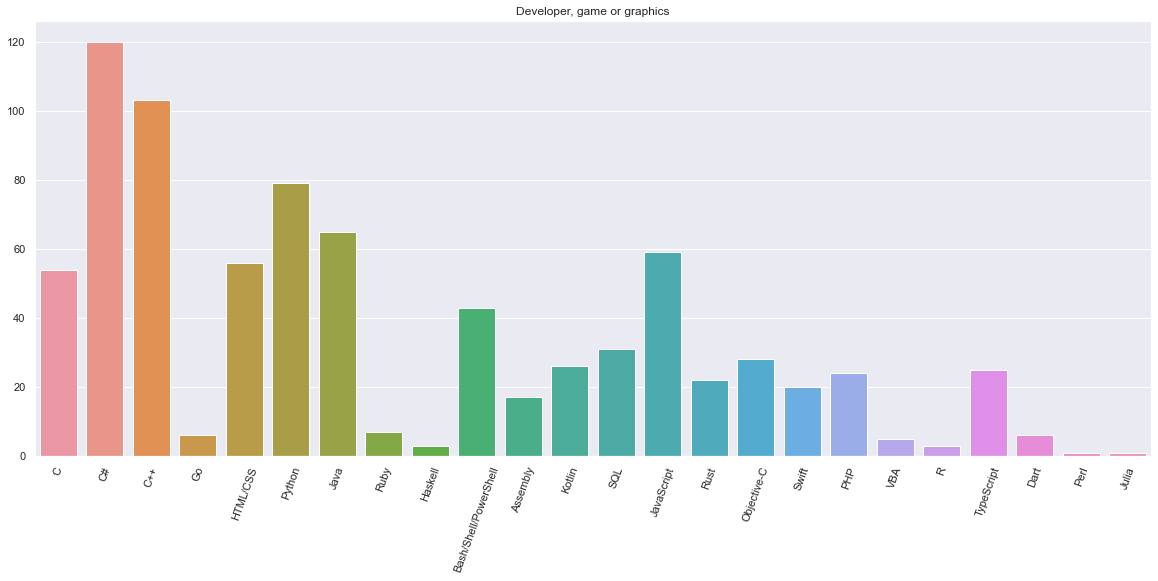


Engineer, data


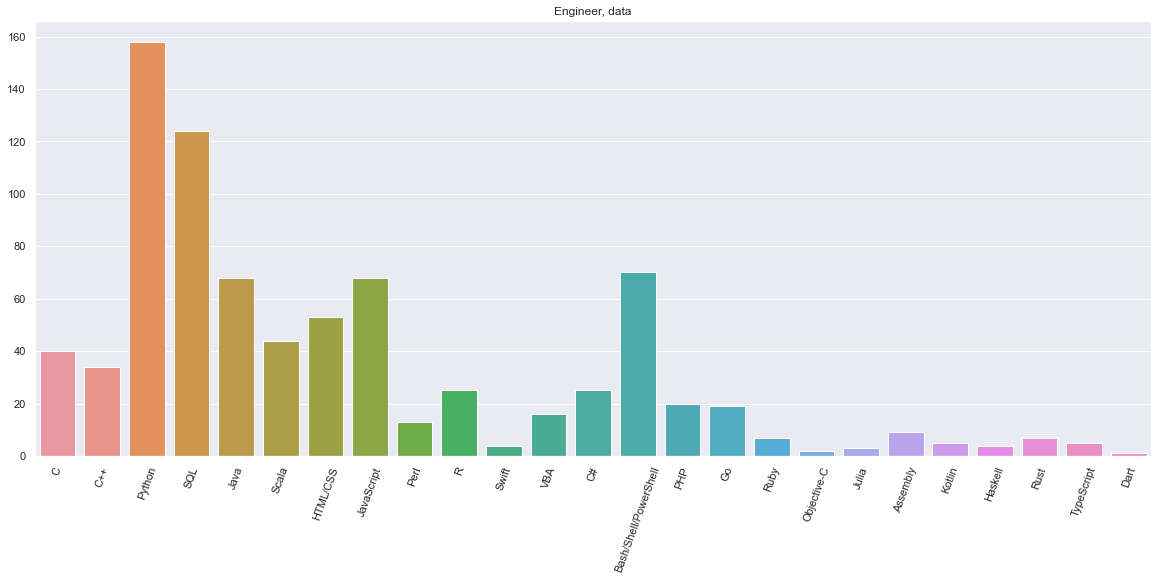


Marketing or sales professional


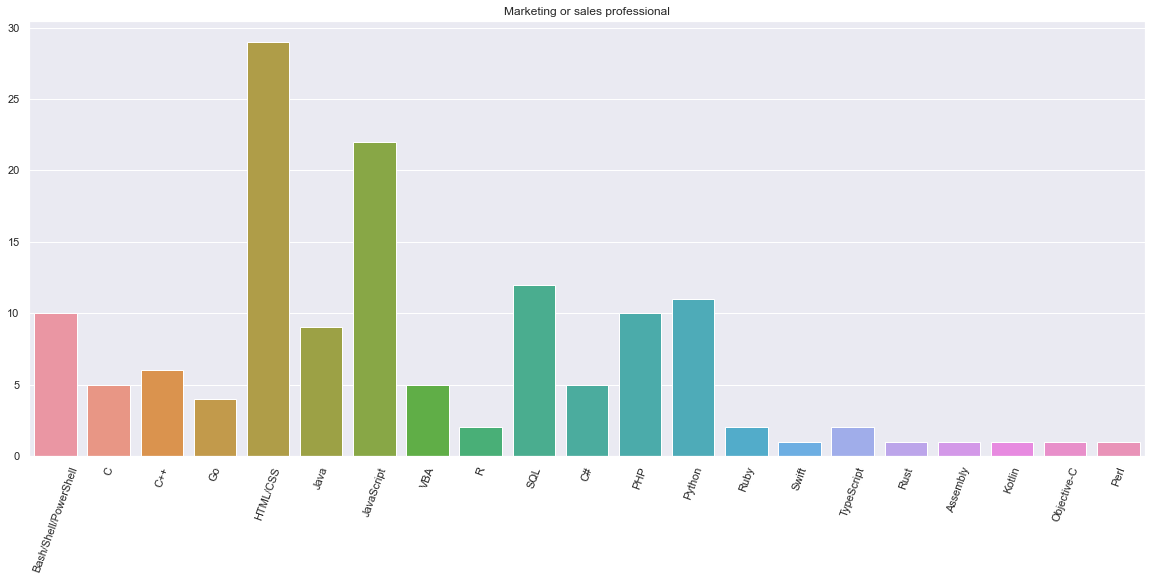


Scientist


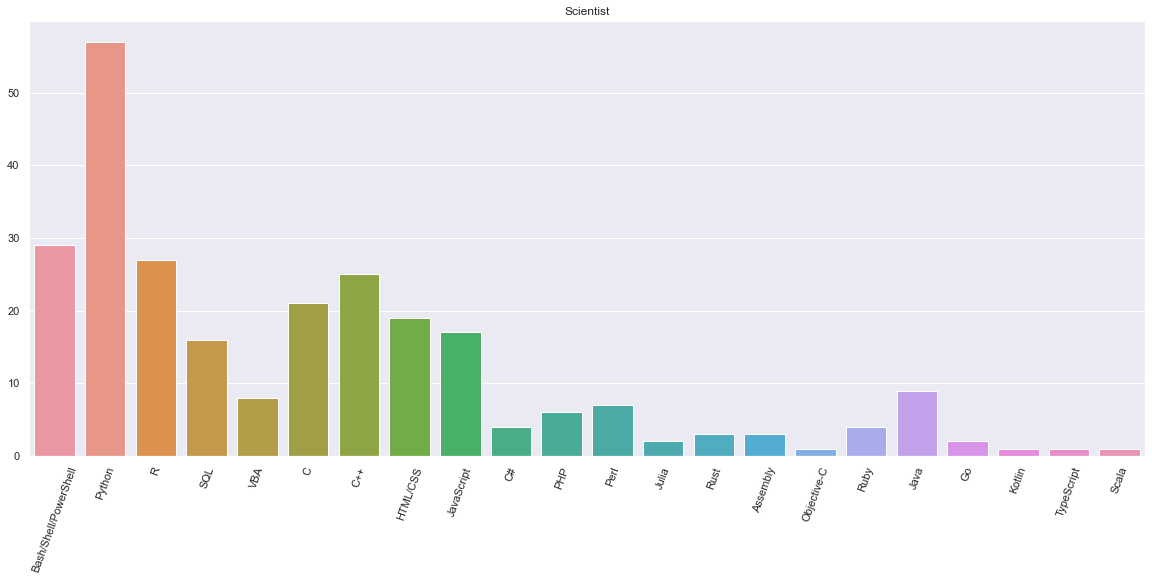


Educator


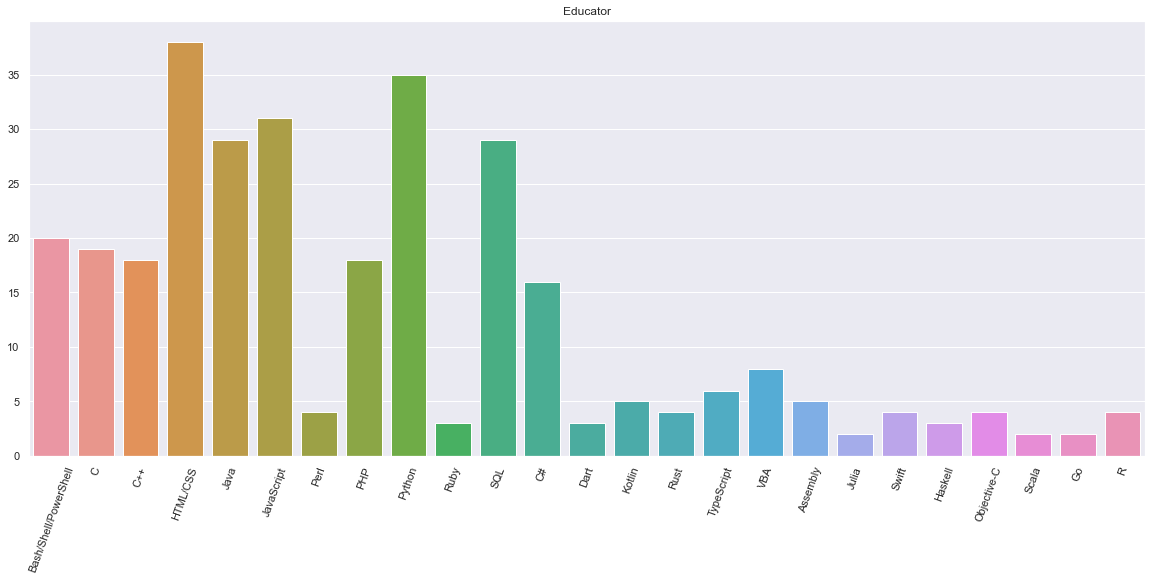


Product manager


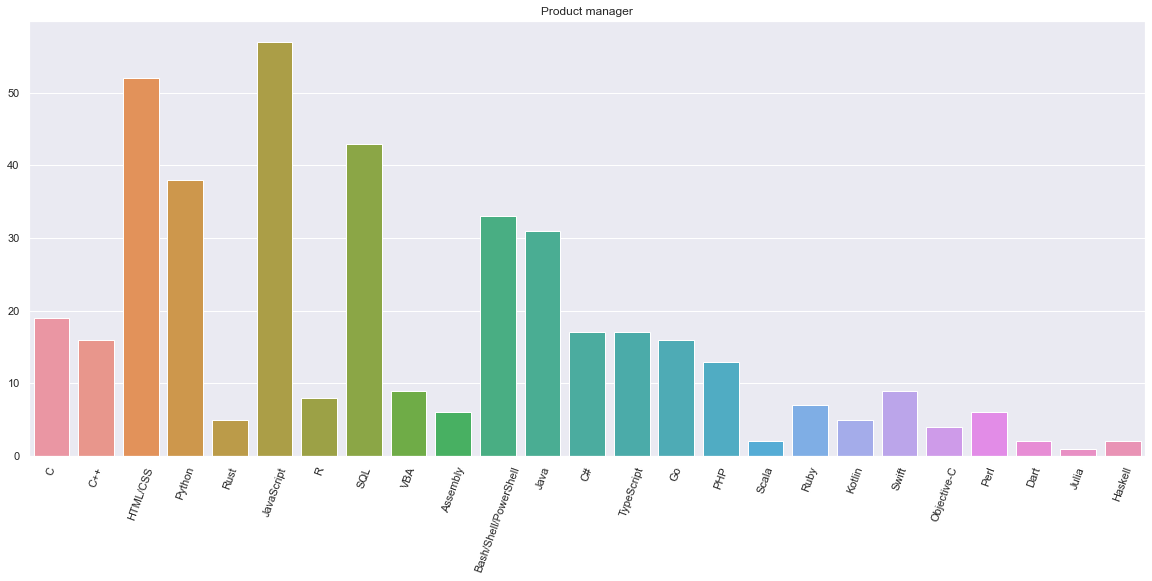


Engineer, site reliability


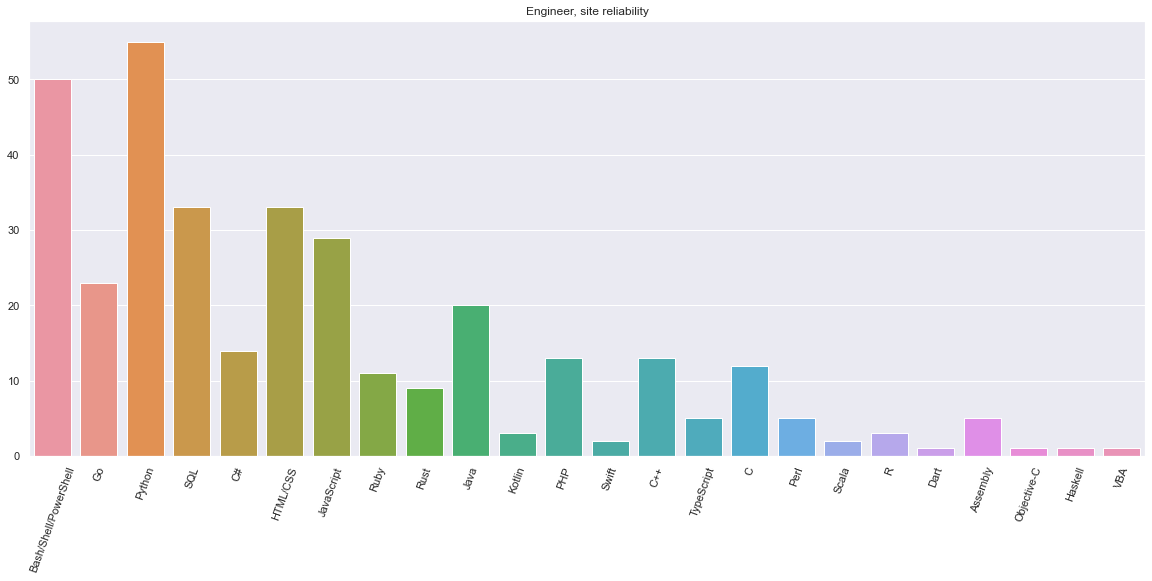

In [17]:
dev_type_info={}
nan_counter=0
for i in range(len(data2020["DevType"])):
  if type(data2020.loc[i,'DevType'])==float:
    nan_counter+=1
  else:
    dev_types = data2020.loc[i, 'DevType'].split(';')
    for dev_type in dev_types:
      dev_type_info.setdefault(dev_type, {
          'total':0,
          'language_counter':Counter()
      })
      if type(data2020.loc[i,'LanguageWorkedWith'])==float:
        nan_counter+=0
      else:
        languages = data2020.loc[i, 'LanguageWorkedWith'].split(';')
        dev_type_info[dev_type]['language_counter'].update(languages)
        dev_type_info[dev_type]['total']+=1
      break

for dev_type, info in dev_type_info.items():
  print(dev_type)
  languages=[]
  values=[]
  for language, value in info['language_counter'].items():
    language_pct = (value/info['total'])*100
    language_pct = round(language_pct, 2)
    languages.append(language)
    values.append(value)
  f=plt.figure()
  f.set_figwidth(20)
  f.set_figheight(8)
  sns.barplot(x=languages, y=values)
  plt.title(dev_type)
  plt.xticks(rotation=70)
  plt.show()
  print()